In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report   

df=pd.read_csv("housing.csv")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df.head(7)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY

<Axes: xlabel='total_bedrooms', ylabel='Density'>

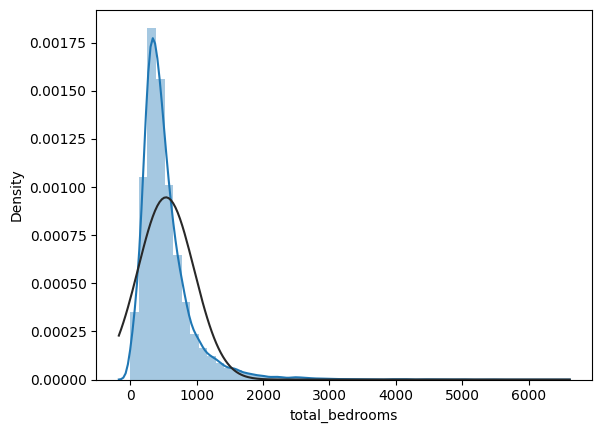

In [5]:
from scipy.stats import norm
sns.distplot(df["total_bedrooms"],fit=norm)

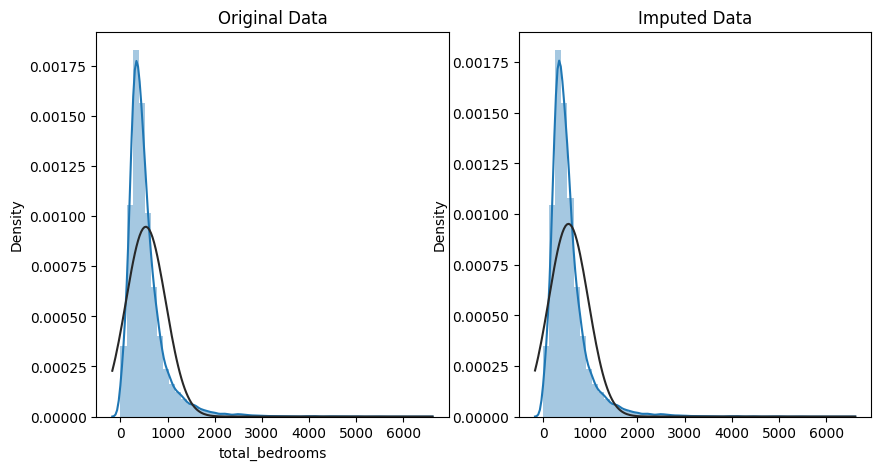

Original data skew :  3.459546331523342
Imputed data skew :  total_bedrooms    3.477023
dtype: float64


In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
randomseed=42
imputer = IterativeImputer(max_iter=10, random_state=randomseed)
X = df["total_bedrooms"].values.reshape(-1, 1)  
df_totb = imputer.fit_transform(X)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df["total_bedrooms"], kde=True,fit=norm)  
plt.title("Original Data")

plt.subplot(1, 2, 2)
sns.distplot(df_totb, kde=True,fit=norm)  
plt.title("Imputed Data")
df_totb = pd.DataFrame(df_totb, columns=["total_bedrooms"])
plt.show()
print("Original data skew : ",df["total_bedrooms"].skew())
print("Imputed data skew : ",df_totb.skew())

<Axes: title={'center': 'Stats of imputed data'}>

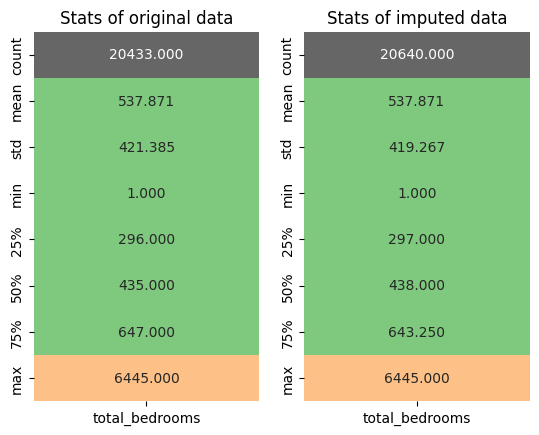

In [7]:
plt.figure()
plt.subplot(1,2,1)
plt.title("Stats of original data")
desc=df["total_bedrooms"].describe().to_frame()
sns.heatmap(data=desc,annot=True,fmt=".3f",cmap="Accent",cbar=False)
plt.subplot(1,2,2)
desc=df_totb.describe()
plt.title("Stats of imputed data")
sns.heatmap(data=desc,cbar=False,annot=True,fmt=".3f",cmap="Accent")

In [8]:
df["total_bedrooms"]=df_totb

In [9]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

encoder = OneHotEncoder(sparse=False, drop="first")
df_encoded_lof = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), 
                              columns=encoder.get_feature_names_out(categorical_cols))

df_numeric_lof = df.select_dtypes(include=np.number).join(df_encoded_lof)

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

y_pred = clf.fit_predict(df_numeric_lof)

outlier_scores = clf.negative_outlier_factor_

outlier_indices = outlier_scores < -1.5

outliers = df[outlier_indices]


print("Number Of Outliers:", len(outliers))


Number Of Outliers: 581


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Figure size 1200x600 with 0 Axes>

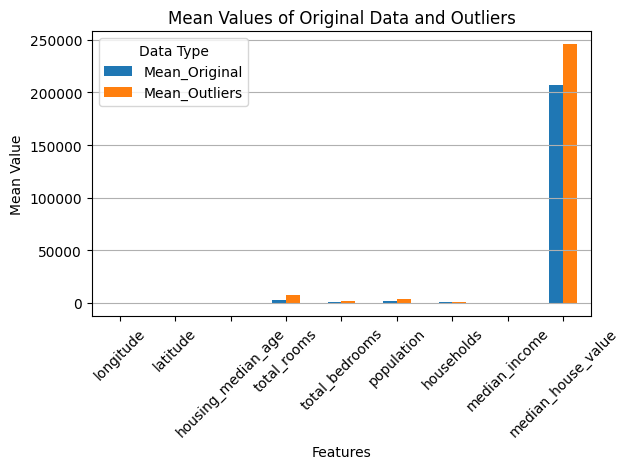

In [11]:
import pandas as pd

original_stats = df.describe().T[['mean', 'std','min','25%','50%','75%','max']]
original_stats.columns = ['Mean','Std','Min','25%','Median','75%','Max']

outlier_stats = outliers.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
outlier_stats.columns = ['Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max']

stats_comparison = original_stats.join(outlier_stats, lsuffix='_Original', rsuffix='_Outliers')

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
stats_comparison[['Mean_Original', 'Mean_Outliers']].plot(kind='bar')

plt.title('Mean Values of Original Data and Outliers')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)


plt.legend(title='Data Type')

plt.grid(axis='y')


plt.tight_layout()


plt.show()


In [12]:
outliers=outliers.index

In [13]:
outliers

Int64Index([   89,   283,   458,   459,   460,   576,   712,   864,   865,
              871,
            ...
            20425, 20427, 20428, 20440, 20451, 20527, 20529, 20530, 20533,
            20629],
           dtype='int64', length=581)

In [14]:
df.drop(labels=outliers,inplace=True)

In [15]:
df.reset_index(inplace=True)


In [16]:
df.drop(columns="index",axis=1,inplace=True)

In [17]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20054    -121.09     39.48                25.0       1665.0           374.0   
20055    -121.21     39.49                18.0        697.0           150.0   
20056    -121.22     39.43                17.0       2254.0           485.0   
20057    -121.32     39.43                18.0       1860.0           409.0   
20058    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20054       845.0       330.0         1.5603             78100.0   
20055       356.0       114.0         2.5568             77100.0   
20056      1007.0       433.0         1.7000             92300.0   
20057       741.0       349.0         1.8672             84700.0   
20058      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20054          INLAND  
20055          INLAND  
20056          INLAND  
20057          INLAND  
20058          INLAND  

[20059 rows x 10 columns]

In [18]:
df["region"] = pd.cut(df["longitude"], bins=[-125, -120, -115, -110], labels=["coastal", "near_coastal", "inland"])
df["income_category"] = pd.cut(df["median_income"], bins=[0, 2, 4, 6, 8, 10], labels=["low","mid_low","mid", "mid_high", "high"])
df["bedroom_to_room_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["bedrooms_per_person"] = df["total_bedrooms"] / df["population"]
df["rooms_per_person"] = df["total_rooms"] / df["population"]
df["population_density"] = df["population"] / df["households"]


In [19]:

corr_matrix=df.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude               1.000000 -0.926451           -0.103398     0.031266   
latitude               -0.926451  1.000000            0.007127    -0.027721   
housing_median_age     -0.103398  0.007127            1.000000    -0.362365   
total_rooms             0.031266 -0.027721           -0.362365     1.000000   
total_bedrooms          0.056752 -0.060821           -0.310393     0.914413   
population              0.109929 -0.120111           -0.298890     0.859303   
households              0.050105 -0.067935           -0.295287     0.915683   
median_income          -0.013294 -0.080927           -0.111009     0.206565   
median_house_value     -0.044326 -0.144576            0.113412     0.141405   
bedroom_to_room_ratio   0.073817 -0.089323            0.123992    -0.196584   
bedrooms_per_person    -0.068513  0.109648           -0.036191     0.022760   
rooms_per_person       -0.114589  0.165461           -0.114551     0.144943   
population_density      0.160337 -0.152344           -0.002333    -0.139786   

                       total_bedrooms  population  households  median_income  \
longitude                    0.056752    0.109929    0.050105      -0.013294   
latitude                    -0.060821   -0.120111   -0.067935      -0.080927   
housing_median_age          -0.310393   -0.298890   -0.295287      -0.111009   
total_rooms                  0.914413    0.859303    0.915683       0.206565   
total_bedrooms               1.000000    0.880620    0.980653      -0.031593   
population                   0.880620    1.000000    0.908912      -0.014035   
households                   0.980653    0.908912    1.000000      -0.006817   
median_income               -0.031593   -0.014035   -0.006817       1.000000   
median_house_value           0.039849   -0.050063    0.055009       0.692788   
bedroom_to_room_ratio        0.085713    0.003968    0.033354      -0.508280   
bedrooms_per_person          0.096603   -0.157482    0.013182      -0.046763   
rooms_per_person             0.037171   -0.179101   -0.021417       0.310309   
population_density          -0.178013    0.161087   -0.162531      -0.059024   

                       median_house_value  bedroom_to_room_ratio  \
longitude                       -0.044326               0.073817   
latitude                        -0.144576              -0.089323   
housing_median_age               0.113412               0.123992   
total_rooms                      0.141405              -0.196584   
total_bedrooms                   0.039849               0.085713   
population                      -0.050063               0.003968   
households                       0.055009               0.033354   
median_income                    0.692788              -0.508280   
median_house_value               1.000000              -0.229105   
bedroom_to_room_ratio           -0.229105               1.000000   
bedrooms_per_person              0.082482               0.352051   
rooms_per_person                 0.278686              -0.280341   
population_density              -0.257806               0.010614   

                       bedrooms_per_person  rooms_per_person  \
longitude                        -0.068513         -0.114589   
latitude                          0.109648          0.165461   
housing_median_age               -0.036191         -0.114551   
total_rooms                       0.022760          0.144943   
total_bedrooms                    0.096603          0.037171   
population                       -0.157482         -0.179101   
households                        0.013182         -0.021417   
median_income                    -0.046763          0.310309   
median_house_value                0.082482          0.278686   
bedroom_to_room_ratio             0.352051         -0.280341   
bedrooms_per_person               1.000000          0.735634   
rooms_per_person                  0.735634          1.000000   
population

<Axes: title={'center': 'Distribition of Raw Data'}, xlabel='median_house_value', ylabel='Density'>

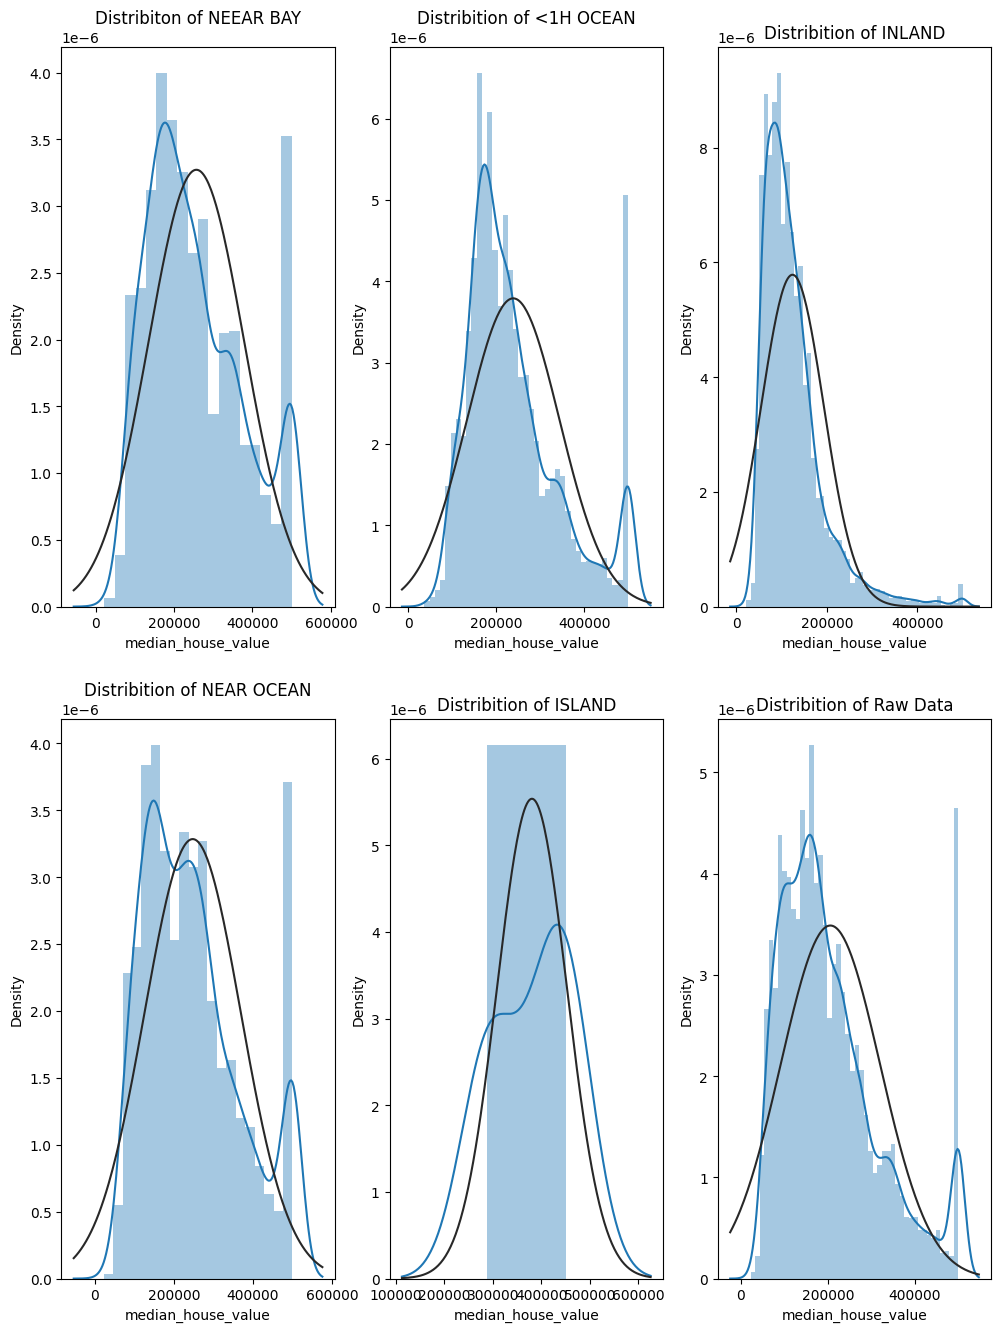

In [20]:
plt.figure(figsize=(12,16))
plt.subplot(2,3,1)
plt.title("Distribiton of NEEAR BAY")
a=df[df["ocean_proximity"]=="NEAR BAY"]
sns.distplot(a["median_house_value"],fit=norm)
plt.subplot(2,3,2)
plt.title("Distribition of <1H OCEAN")
a=df[df["ocean_proximity"]=="<1H OCEAN"]
sns.distplot(a["median_house_value"],fit=norm)
plt.subplot(2,3,3)
plt.title("Distribition of INLAND")
a=df[df["ocean_proximity"]=="INLAND"]
sns.distplot(a["median_house_value"],fit=norm)
plt.subplot(2,3,4)
plt.title("Distribition of NEAR OCEAN")
a=df[df["ocean_proximity"]=="NEAR OCEAN"]
sns.distplot(a["median_house_value"],fit=norm)
plt.subplot(2,3,5)
plt.title("Distribition of ISLAND")
a=df[df["ocean_proximity"]=="ISLAND"]
sns.distplot(a["median_house_value"],fit=norm)
plt.subplot(2,3,6)
plt.title("Distribition of Raw Data")
sns.distplot(df["median_house_value"],fit=norm)

In [21]:
df["region"].nunique()
df["region"].unique()

['coastal', 'near_coastal', 'inland']
Categories (3, object): ['coastal' < 'near_coastal' < 'inland']

<Axes: xlabel='region', ylabel='Count'>

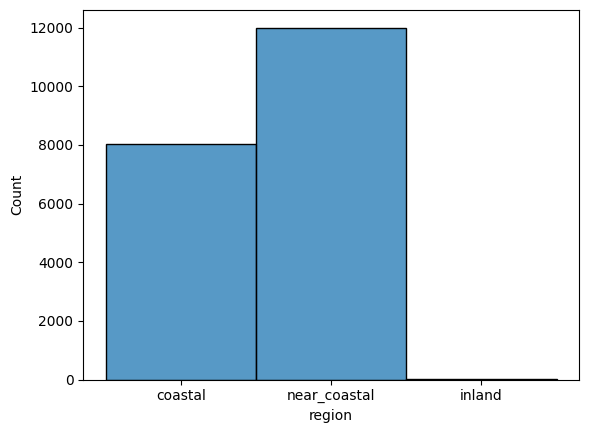

In [22]:
sns.histplot(data=df["region"])

<Axes: title={'center': 'Distribition of inland'}, xlabel='median_house_value', ylabel='Count'>

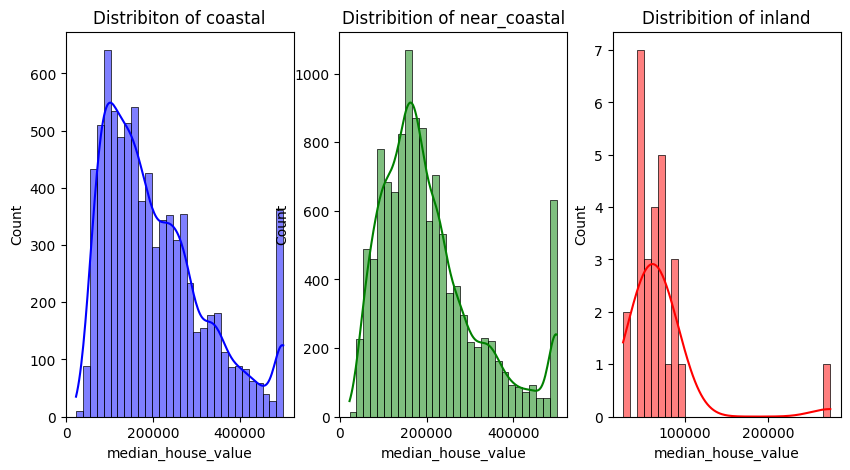

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Distribiton of coastal")
a=df[df["region"]=="coastal"]
sns.histplot(a["median_house_value"], kde=True, bins=30, color="blue")
plt.subplot(1,3,2)
plt.title("Distribition of near_coastal")
a=df[df["region"]=="near_coastal"]
sns.histplot(a["median_house_value"], kde=True, bins=30, color="green")
plt.subplot(1,3,3)
plt.title("Distribition of inland")
a=df[df["region"]=="inland"]
sns.histplot(a["median_house_value"], kde=True, bins=30, color="red")


In [24]:
import plotly.express as px

numerical_columns = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'bedroom_to_room_ratio',
    'bedrooms_per_person', 'rooms_per_person', 'population_density'
]

correlations = df[numerical_columns + ['median_house_value']].corr()['median_house_value'].drop('median_house_value')

correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

fig = px.imshow(
    [correlation_df['Correlation']],  
    labels=dict(x="Features", y="Median House Value", color="Correlation"),
    x=correlation_df['Feature'],  
    y=["Median House Value"],  
    color_continuous_scale="Viridis"  
)

fig.update_layout(
    title="Correlation with Median House Value",
    width=900,
    height=400
)

fig.show()


In [25]:
weak_features=correlations[abs(correlations)<0.1].index.tolist()

df_cleaned=df.drop(columns=weak_features)

In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20059 entries, 0 to 20058
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   latitude               20059 non-null  float64 
 1   housing_median_age     20059 non-null  float64 
 2   total_rooms            20059 non-null  float64 
 3   median_income          20059 non-null  float64 
 4   median_house_value     20059 non-null  float64 
 5   ocean_proximity        20059 non-null  object  
 6   region                 20059 non-null  category
 7   income_category        19761 non-null  category
 8   bedroom_to_room_ratio  20059 non-null  float64 
 9   rooms_per_person       20059 non-null  float64 
 10  population_density     20059 non-null  float64 
dtypes: category(2), float64(8), object(1)
memory usage: 1.4+ MB


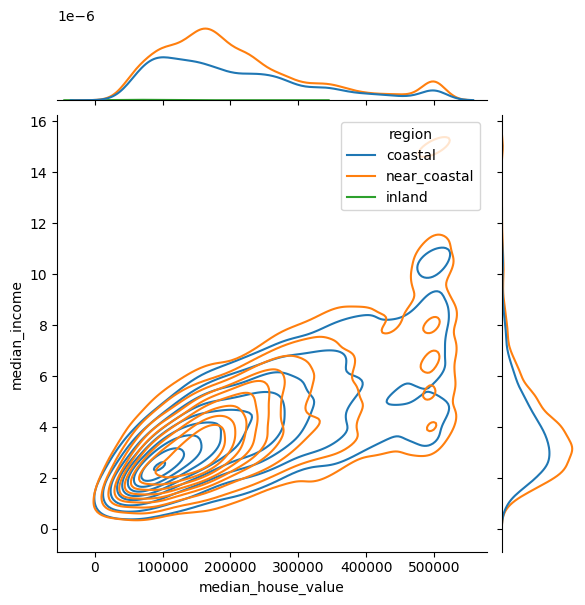

In [27]:
g = sns.jointplot(
    data=df_cleaned,
    x="median_house_value", y="median_income", hue="region",
    kind="kde",
)

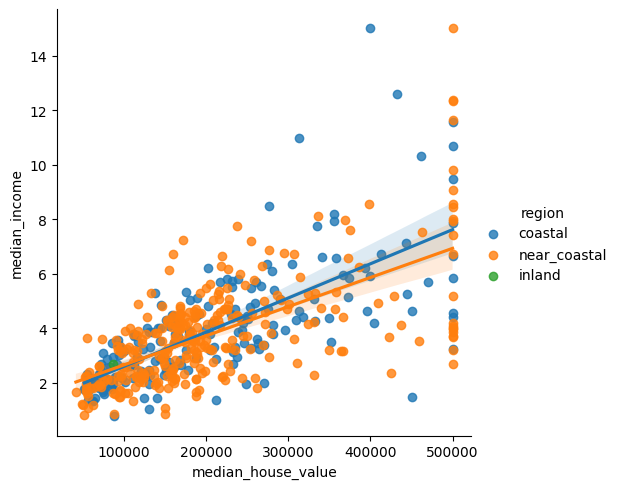

In [28]:
df_sampled = df_cleaned.sample(n=500, random_state=42)
g = sns.lmplot(
    data=df_sampled,
    x="median_house_value", y="median_income", hue="region",
    height=5
)

g.set_axis_labels("median_house_value", "median_income")

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20059 entries, 0 to 20058
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   latitude               20059 non-null  float64 
 1   housing_median_age     20059 non-null  float64 
 2   total_rooms            20059 non-null  float64 
 3   median_income          20059 non-null  float64 
 4   median_house_value     20059 non-null  float64 
 5   ocean_proximity        20059 non-null  object  
 6   region                 20059 non-null  category
 7   income_category        19761 non-null  category
 8   bedroom_to_room_ratio  20059 non-null  float64 
 9   rooms_per_person       20059 non-null  float64 
 10  population_density     20059 non-null  float64 
dtypes: category(2), float64(8), object(1)
memory usage: 1.4+ MB


In [30]:

df_cleaned["is_near_ocean"]=df_cleaned["ocean_proximity"].map({
        "NEAR BAY": 1,
        "NEAR OCEAN": 1,
        "INLAND": 0,
        "<1H OCEAN": 0
    })

In [31]:
df_cleaned.drop(columns="ocean_proximity",axis=1,inplace=True)

In [32]:
df_cleaned=df_cleaned.dropna(subset=['income_category'])

In [33]:
df_cleaned

latitude  housing_median_age  total_rooms  median_income  \
0         37.88                41.0        880.0         8.3252   
1         37.86                21.0       7099.0         8.3014   
2         37.85                52.0       1467.0         7.2574   
3         37.85                52.0       1274.0         5.6431   
4         37.85                52.0       1627.0         3.8462   
...         ...                 ...          ...            ...   
20054     39.48                25.0       1665.0         1.5603   
20055     39.49                18.0        697.0         2.5568   
20056     39.43                17.0       2254.0         1.7000   
20057     39.43                18.0       1860.0         1.8672   
20058     39.37                16.0       2785.0         2.3886   

       median_house_value   region income_category  bedroom_to_room_ratio  \
0                452600.0  coastal            high               0.146591   
1                358500.0  coastal            high               0.155797   
2                352100.0  coastal        mid_high               0.129516   
3                341300.0  coastal             mid               0.184458   
4                342200.0  coastal         mid_low               0.172096   
...                   ...      ...             ...                    ...   
20054             78100.0  coastal             low               0.224625   
20055             77100.0  coastal         mid_low               0.215208   
20056             92300.0  coastal             low               0.215173   
20057             84700.0  coastal             low               0.219892   
20058             89400.0  coastal         mid_low               0.221185   

       rooms_per_person  population_density  is_near_ocean  
0              2.732919            2.555556            1.0  
1              2.956685            2.109842            1.0  
2              2.957661            2.802260            1.0  
3              2.283154            2.547945            1.0  
4              2.879646            2.181467            1.0  
...                 ...                 ...            ...  
20054          1.970414            2.560606            0.0  
20055          1.957865            3.122807            0.0  
20056          2.238332            2.325635            0.0  
20057          2.510121            2.123209            0.0  
20058          2.007931            2.616981            0.0  

[19761 rows x 11 columns]

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

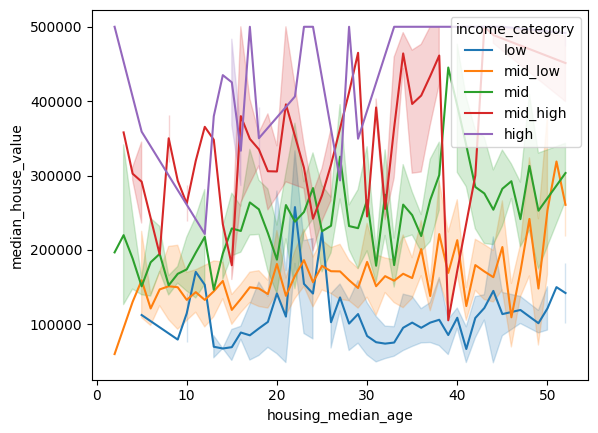

In [34]:
df_sampled=df_cleaned.sample(n=1400,random_state=42)
sns.lineplot(data=df_sampled,x="housing_median_age",y="median_house_value",hue="income_category")

[Text(-23.777777777777786, 0.5, '')]

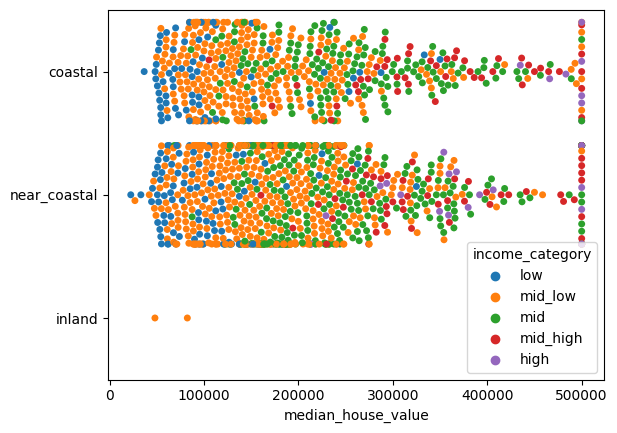

In [35]:
ax = sns.swarmplot(data=df_sampled, x="median_house_value", y="region", hue="income_category")
ax.set(ylabel="")

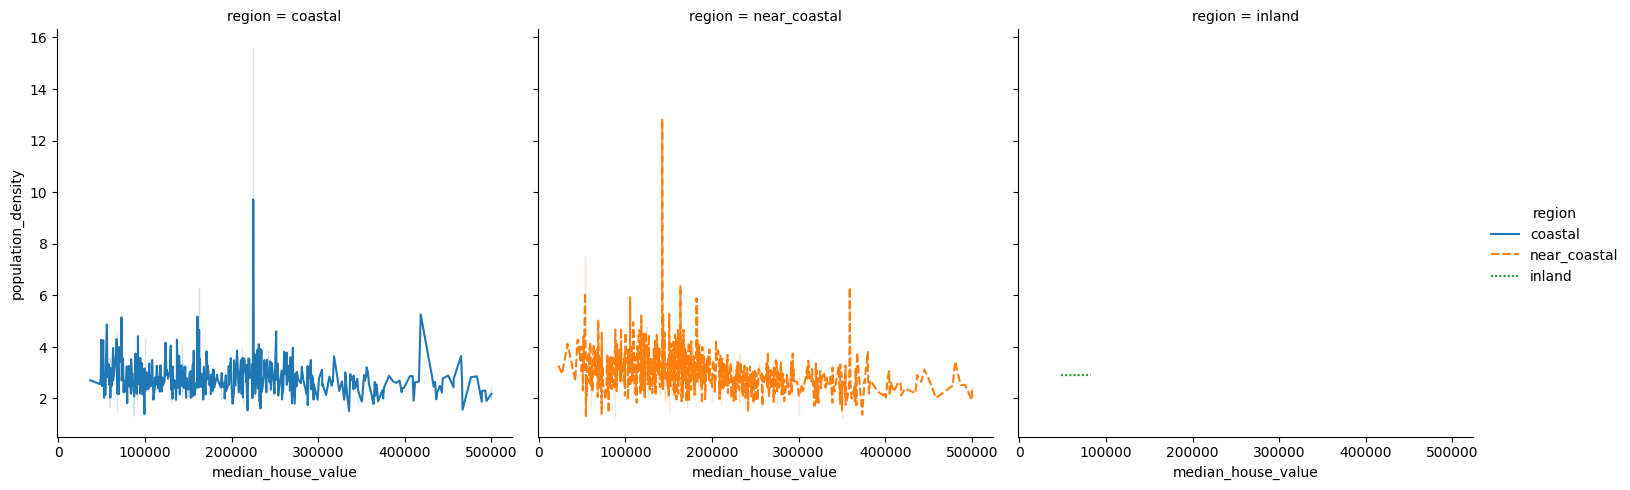

In [36]:
sns.relplot(
    data=df_sampled, x="median_house_value", y="population_density", col="region",
    hue="region", style="region", kind="line",
)

In [37]:
df_cleaned=df_cleaned[df_cleaned["region"]!="inland"]

In [38]:
grouped=df_cleaned.groupby("income_category")["median_house_value"].mean()
print(grouped)

income_category
low         109111.046841
mid_low     168092.872153
mid         244184.236598
mid_high    344357.058824
high        442309.886040
Name: median_house_value, dtype: float64


In [39]:
grouped=df_cleaned.groupby("region")["median_house_value"].mean()
print(grouped)

region
coastal         200326.806745
near_coastal    202643.465262
inland                    NaN
Name: median_house_value, dtype: float64


In [40]:
grouped=df_cleaned.groupby("region")["median_house_value"].median()
print(grouped)

region
coastal         174200.0
near_coastal    178500.0
inland               NaN
Name: median_house_value, dtype: float64


In [41]:
grouped=df_cleaned.groupby("region")["median_house_value"].std()
print(grouped)

region
coastal         111536.751418
near_coastal    108492.760580
inland                    NaN
Name: median_house_value, dtype: float64


In [42]:
df_cleaned["income_category"].unique()

['high', 'mid_high', 'mid', 'mid_low', 'low']
Categories (5, object): ['low' < 'mid_low' < 'mid' < 'mid_high' < 'high']

In [43]:
df_cleaned=df_cleaned.drop(columns=["region"])

category_order=['low', 'mid_low', 'mid', 'mid_high', 'high']

df_cleaned["income_category"] = pd.Categorical(df_cleaned["income_category"], categories=category_order, ordered=True)

df_cleaned["income_category"] = df_cleaned["income_category"].cat.codes



In [44]:
df_cleaned = df_cleaned.dropna(subset=['is_near_ocean'])

In [45]:
import statsmodels.api as sm
X = df_cleaned[['latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                'income_category', 'bedroom_to_room_ratio', 'rooms_per_person', 
                'population_density', 'is_near_ocean']]

y = df_cleaned['median_house_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     3222.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:52:59   Log-Likelihood:            -2.4804e+05
No. Observations:               19729   AIC:                         4.961e+05
Df Residuals:                   19719   BIC:                         4.962e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.615e+

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'latitude'),
  Text(1, 0, 'housing_median_age'),
  Text(2, 0, 'total_rooms'),
  Text(3, 0, 'median_income'),
  Text(4, 0, 'median_house_value'),
  Text(5, 0, 'income_category'),
  Text(6, 0, 'bedroom_to_room_ratio'),
  Text(7, 0, 'rooms_per_person'),
  Text(8, 0, 'population_density'),
  Text(9, 0, 'is_near_ocean')])

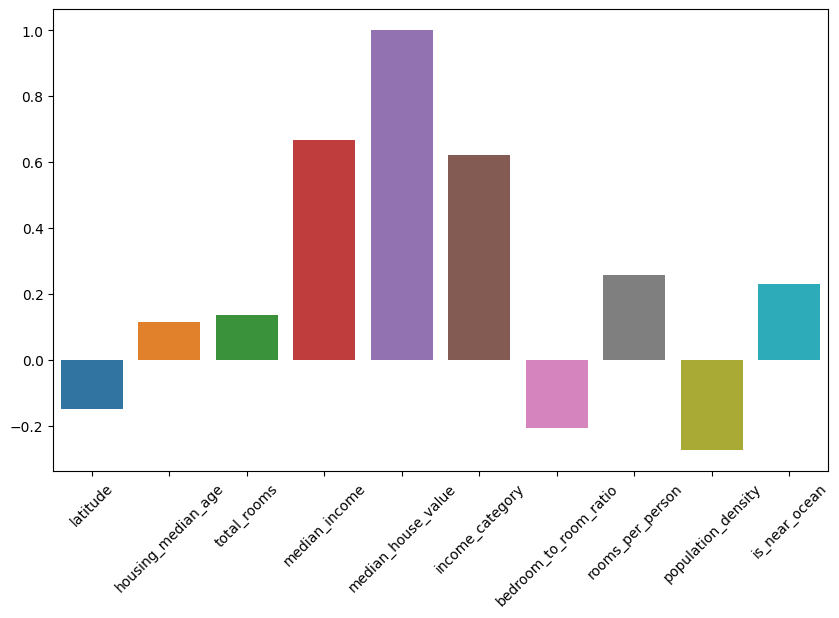

In [46]:
correlation = df_cleaned.corr(method='pearson')
corr_median_house_value = correlation["median_house_value"]
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_median_house_value.index, y=corr_median_house_value.values)
plt.xticks(rotation=45)

<Axes: xlabel='median_income', ylabel='median_house_value'>

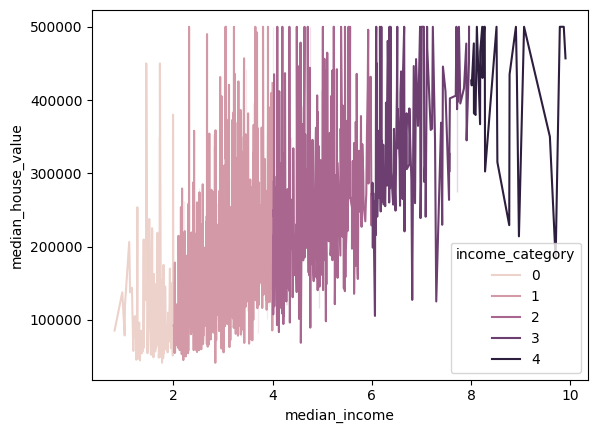

In [47]:
df_sampled=df_cleaned.sample(n=1400,random_state=42)
sns.lineplot(data=df_sampled,x="median_income",y="median_house_value",hue="income_category")

In [48]:
df_cleaned = df_cleaned.drop(columns=["income_category"])


In [49]:
print(df_cleaned.mean())

latitude                     35.648460
housing_median_age           28.839728
total_rooms                2490.450859
median_income                 3.745400
median_house_value       201668.759592
bedroom_to_room_ratio         0.214872
rooms_per_person              1.936928
population_density            2.921474
is_near_ocean                 0.239495
dtype: float64


In [50]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19729 entries, 0 to 20058
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               19729 non-null  float64
 1   housing_median_age     19729 non-null  float64
 2   total_rooms            19729 non-null  float64
 3   median_income          19729 non-null  float64
 4   median_house_value     19729 non-null  float64
 5   bedroom_to_room_ratio  19729 non-null  float64
 6   rooms_per_person       19729 non-null  float64
 7   population_density     19729 non-null  float64
 8   is_near_ocean          19729 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [51]:
skew_values = df_cleaned.skew()
print(skew_values)

latitude                  0.450677
housing_median_age        0.047998
total_rooms               2.455057
median_income             0.826936
median_house_value        0.992569
bedroom_to_room_ratio     5.494272
rooms_per_person         14.084486
population_density        3.288012
is_near_ocean             1.220898
dtype: float64


In [52]:
df_cleaned['total_rooms'] = np.log1p(df_cleaned['total_rooms'])
df_cleaned['median_income'] = np.log1p(df_cleaned['median_income'])
df_cleaned['median_house_value'] = np.log1p(df_cleaned['median_house_value'])
df_cleaned['bedroom_to_room_ratio'] = np.log1p(df_cleaned['bedroom_to_room_ratio'])
df_cleaned['rooms_per_person'] = np.log1p(df_cleaned['rooms_per_person'])
df_cleaned['population_density'] = np.log1p(df_cleaned['population_density'])

In [53]:
skew_values = df_cleaned.skew()
print(skew_values)

latitude                 0.450677
housing_median_age       0.047998
total_rooms             -1.254976
median_income           -0.035749
median_house_value      -0.166478
bedroom_to_room_ratio    2.993069
rooms_per_person         0.577294
population_density       0.588515
is_near_ocean            1.220898
dtype: float64


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['total_rooms', 'median_income', 'latitude',"housing_median_age", 
                    'bedroom_to_room_ratio', 'rooms_per_person', 'population_density']

df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

In [55]:
import statsmodels.api as sm
X = df_cleaned[['latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                'bedroom_to_room_ratio', 'rooms_per_person', 
                'population_density', 'is_near_ocean']]

y = df_cleaned['median_house_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3895.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:53:02   Log-Likelihood:                -6969.6
No. Observations:               19729   AIC:                         1.396e+04
Df Residuals:                   19720   BIC:                         1.403e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

lasso_mape = (abs((y_test - y_pred_lasso) / y_test)).mean() * 100

print(f"Lasso R²: {lasso_r2}")
print(f"Lasso RMSE: {lasso_rmse}")
print(f"Lasso MAE: {lasso_mae}")
print(f"Lasso MAPE: {lasso_mape}%")

Lasso R²: 0.4333491148548958
Lasso RMSE: 0.4184323274132765
Lasso MAE: 0.3317077365789
Lasso MAPE: 2.7659903740918996%


In [57]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)


ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)


ridge_mape = (abs((y_test - y_pred_ridge) / y_test)).mean() * 100

print(f"Ridge R²: {ridge_r2}")
print(f"Ridge RMSE: {ridge_rmse}")
print(f"Ridge MAE: {ridge_mae}")
print(f"Ridge MAPE: {ridge_mape}%")


Ridge R²: 0.624549948859699
Ridge RMSE: 0.34059912522639957
Ridge MAE: 0.2623880113393299
Ridge MAPE: 2.189456002499638%


In [58]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

xgb_mape = (abs((y_test - y_pred_xgb) / y_test)).mean() * 100

print(f"XGBoost R²: {xgb_r2}")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MAPE: {xgb_mape}%")


XGBoost R²: 0.7479827632801939
XGBoost RMSE: 0.2790503470570458
XGBoost MAE: 0.20309102023133763
XGBoost MAPE: 1.6888834481773876%


In [59]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,n_estimators=100, max_depth=7,
                             eta=0.1, subsample=0.5, colsample_bytree=0.9)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

xgb_mape = (abs((y_test - y_pred_xgb) / y_test)).mean() * 100

print(f"XGBoost R²: {xgb_r2}")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MAPE: {xgb_mape}%")


XGBoost R²: 0.7605279737227078
XGBoost RMSE: 0.27201624350309433
XGBoost MAE: 0.19918690432772754
XGBoost MAPE: 1.6572940934578375%


Text(1, 13.722367377396328, 'XGBoost MAPE: 1.66%')

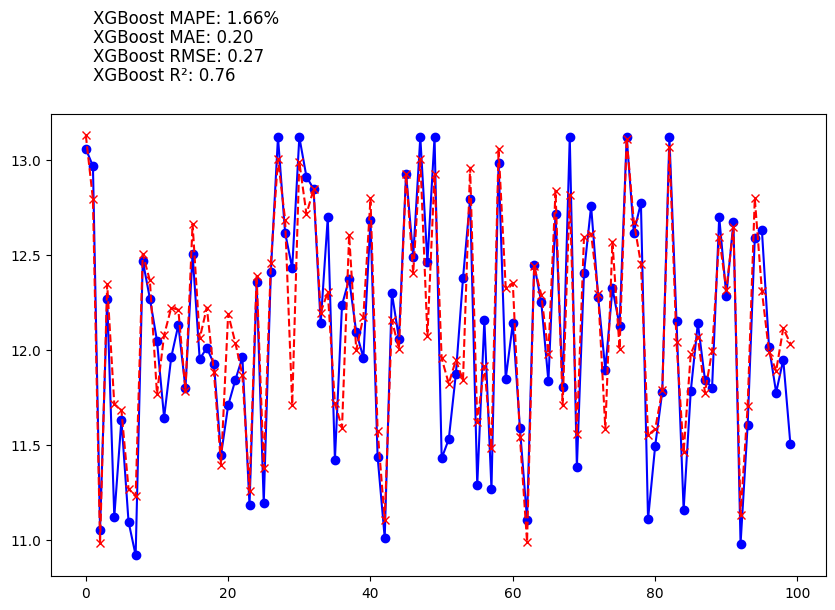

In [60]:
x_values = range(0, 100)


plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test[0:100], color="blue", linestyle="-", marker="o")
plt.plot(x_values, y_pred_xgb[0:100], color="red", linestyle="--", marker="x")
plt.text(1, max(y_test[0:100]) + 0.3,f"XGBoost R²: {xgb_r2:.2f}", fontsize=12)
plt.text(1, max(y_test[0:100]) + 0.4,f"XGBoost RMSE: {xgb_rmse:.2f}", fontsize=12)
plt.text(1, max(y_test[0:100]) + 0.5,f"XGBoost MAE: {xgb_mae:.2f}", fontsize=12)
plt.text(1, max(y_test[0:100]) + 0.6,f"XGBoost MAPE: {xgb_mape:.2f}%", fontsize=12)


In [61]:
y_test_original = np.expm1(y_test)
y_pred_xgb_original = np.expm1(y_pred_xgb)


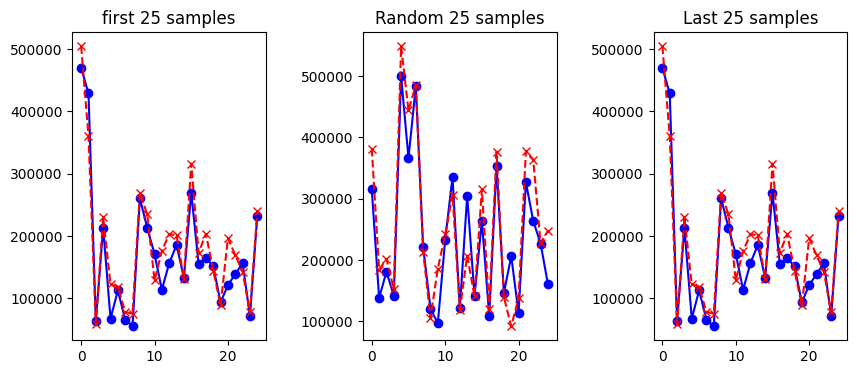

In [62]:
x_values = range(0, 25)
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title("first 25 samples")
plt.plot(x_values, y_test_original[0:25],color='blue',linestyle='-', marker='o')
plt.plot(x_values, y_pred_xgb_original[0:25], color='red', linestyle='--', marker='x')

plt.subplot(1,3,2)
plt.title("Random 25 samples")
x_values=range(0,25)
plt.plot(x_values, y_test_original[100:125],color='blue',linestyle='-', marker='o')
plt.plot(x_values, y_pred_xgb_original[100:125], color='red', linestyle='--', marker='x')
plt.subplot(1,3,3)
plt.title("Last 25 samples")
x_values=range(0,25)
plt.plot(x_values, y_test_original[:25],color='blue',linestyle='-', marker='o')
plt.plot(x_values, y_pred_xgb_original[:25], color='red', linestyle='--', marker='x')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

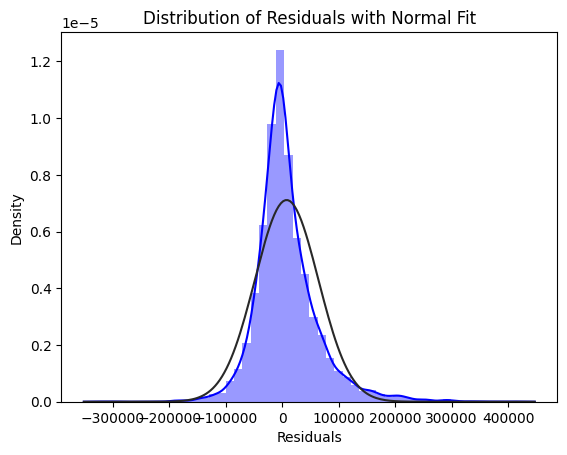

In [63]:
residuals = y_test_original-y_pred_xgb_original
sns.distplot(residuals, kde=True, color='blue', label='Residuals', fit=norm)
plt.title("Distribution of Residuals with Normal Fit")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


In [64]:
residuals.describe()

count      6511.000000
mean       7919.812318
std       56080.695642
min     -321940.093750
25%      -22637.878906
50%        -527.000000
75%       30418.710938
max      417912.992187
Name: median_house_value, dtype: float64

The high standard deviation indicates that the model's predictions are highly variable, meaning it sometimes makes large errors. The negative mean and median suggest that the model generally tends to slightly underpredict the actual values. The wide range of residuals, with min and max values far from zero, shows that the model occasionally makes large errors in both directions, with both low and high prediction errors.

In [65]:
y_test_original.describe()

count      6511.000000
mean     203001.862233
std      110407.736083
min       22500.000000
25%      118800.000000
50%      178600.000000
75%      260350.000000
max      500001.000000
Name: median_house_value, dtype: float64

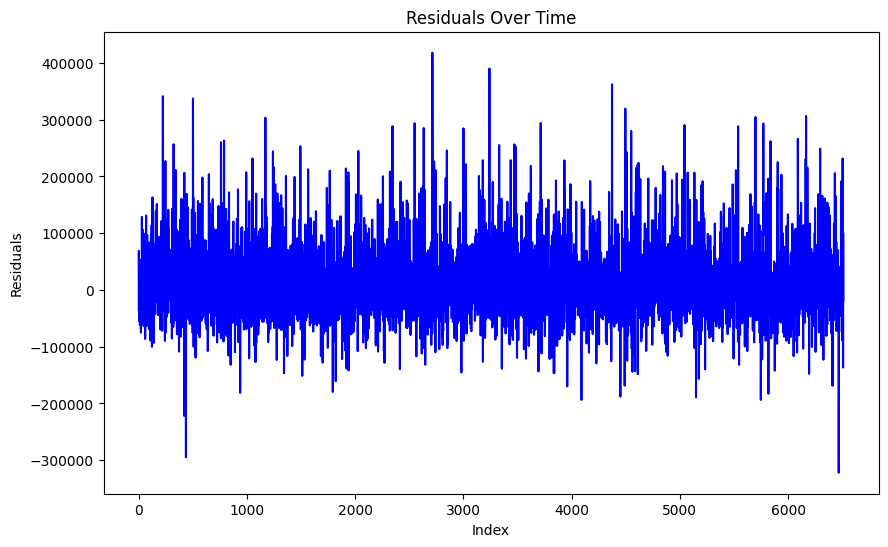

In [66]:
rang = range(0, len(residuals))

plt.figure(figsize=(10, 6))
plt.plot(rang, residuals, color='blue')
plt.title("Residuals Over Time")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.show()

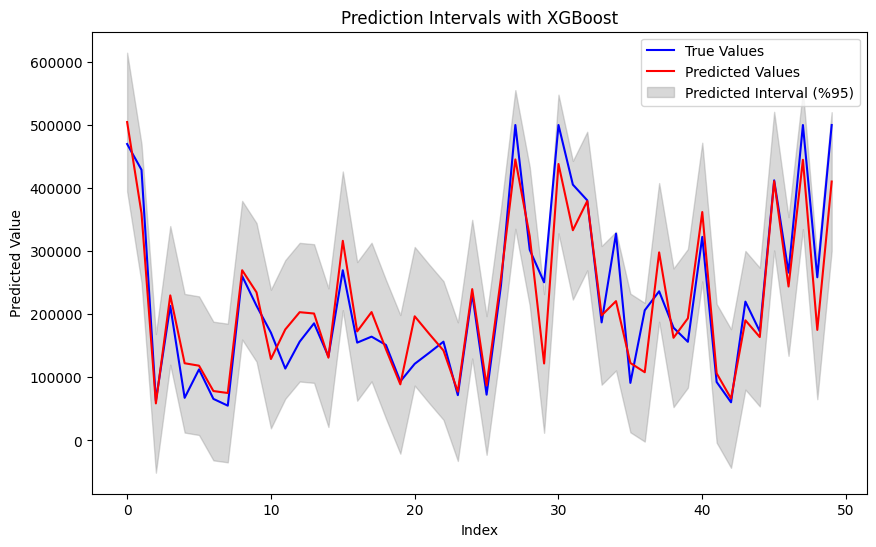

In [67]:
sigma=np.std(residuals)

z=1.96

upper_bound=y_pred_xgb_original+z*sigma
lower_bound=y_pred_xgb_original-z*sigma

x_values = range(0,50)
plt.figure(figsize=(10,6))
plt.plot(x_values, y_test_original.values[:50],label="True Values", color="blue")
plt.plot(x_values, y_pred_xgb_original[:50], label="Predicted Values", color='red')
plt.fill_between(x_values, lower_bound[:50], upper_bound[:50], color='gray', alpha=0.3, label="Predicted Interval (%95)")
plt.legend()
plt.title("Prediction Intervals with XGBoost")
plt.xlabel("Index")
plt.ylabel("Predicted Value")
plt.show()

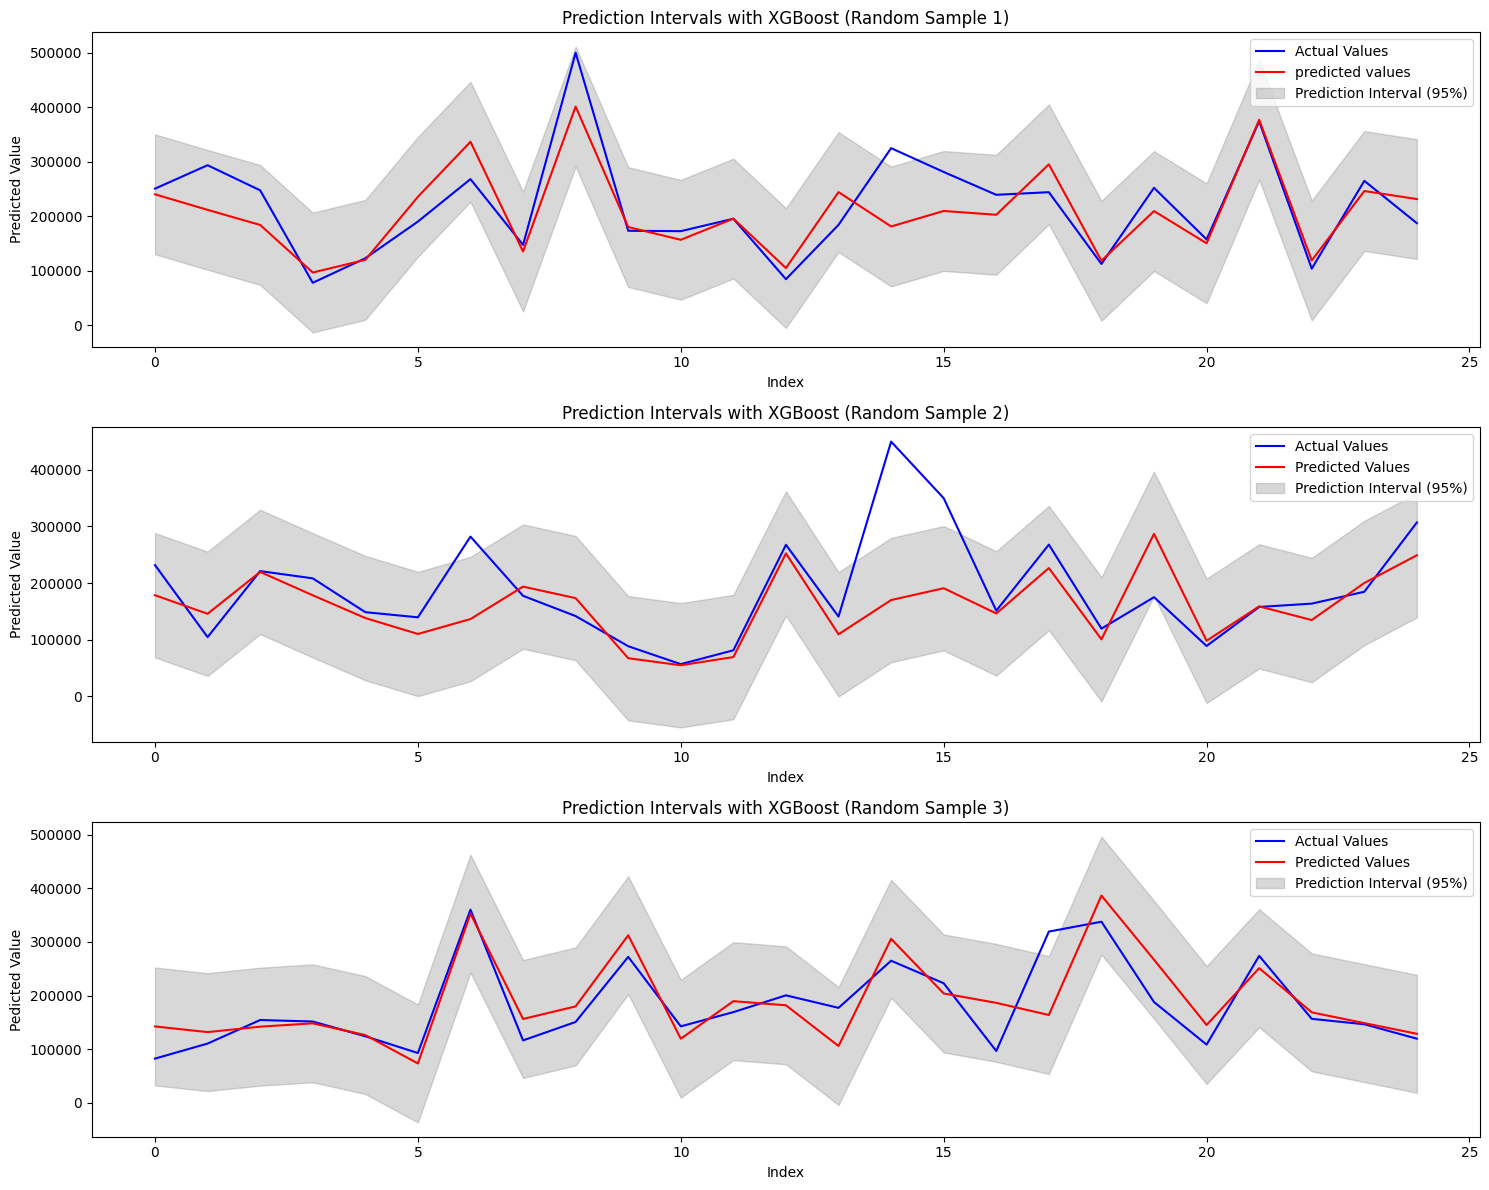

In [68]:
import random

random_indices_1=random.sample(range(0,len(y_pred_xgb_original)),25)
random_indices_2=random.sample(range(0,len(y_pred_xgb_original)),25)
random_indices_3=random.sample(range(0,len(y_pred_xgb_original)),25)


plt.figure(figsize=(15,12))


plt.subplot(3,1,1)
plt.plot(range(25),y_test_original.values[random_indices_1],label="Actual Values",color="blue")
plt.plot(range(25), y_pred_xgb_original[random_indices_1],label="predicted values",color="red")
plt.fill_between(range(25), lower_bound[random_indices_1],upper_bound[random_indices_1],color="gray",alpha=0.3,label="Prediction Interval (95%)")
plt.legend()
plt.title("Prediction Intervals with XGBoost (Random Sample 1)")
plt.xlabel("Index")
plt.ylabel("Predicted Value")


plt.subplot(3, 1, 2)
plt.plot(range(25), y_test_original.values[random_indices_2],label="Actual Values",color="blue")
plt.plot(range(25), y_pred_xgb_original[random_indices_2],label="Predicted Values",color="red")
plt.fill_between(range(25), lower_bound[random_indices_2],upper_bound[random_indices_2],color="gray",alpha=0.3,label="Prediction Interval (95%)")
plt.legend()
plt.title("Prediction Intervals with XGBoost (Random Sample 2)")
plt.xlabel("Index")
plt.ylabel("Predicted Value")


plt.subplot(3, 1, 3)
plt.plot(range(25), y_test_original.values[random_indices_3], label="Actual Values", color="blue")
plt.plot(range(25), y_pred_xgb_original[random_indices_3], label="Predicted Values", color="red")
plt.fill_between(range(25), lower_bound[random_indices_3], upper_bound[random_indices_3], color="gray", alpha=0.3, label="Prediction Interval (95%)")
plt.legend()
plt.title("Prediction Intervals with XGBoost (Random Sample 3)")
plt.xlabel("Index")
plt.ylabel("Pedicted Value")

plt.tight_layout()  
plt.show()


In [69]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


train_data=lgb.Dataset(X_train, label=y_train)
test_data=lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',  
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1
}

model=lgb.train(params,train_data,num_boost_round=800,valid_sets=[train_data,test_data])         


y_pred=model.predict(X_test, num_iteration=model.best_iteration)

rmse=mean_squared_error(y_test, y_pred, squared=False)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
mape=np.mean(np.abs((y_test-y_pred)/y_test))*100  

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 0.2610
MSE: 0.0681
R²: 0.7834
MAPE: 1.61%


In [70]:
y_test_original = np.expm1(y_test)
y_pred_lgbm_original = np.expm1(y_pred)
residuals = y_test_original-y_pred_lgbm_original

In [71]:
residuals.describe()

count      3946.000000
mean       7700.172498
std       54626.499646
min     -226275.855994
25%      -22326.497090
50%          54.905147
75%       29913.298501
max      415822.578666
Name: median_house_value, dtype: float64

In [72]:
y_test_original.describe()

count      3946.000000
mean     203289.745565
std      111667.184745
min       36600.000000
25%      117600.000000
50%      178450.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

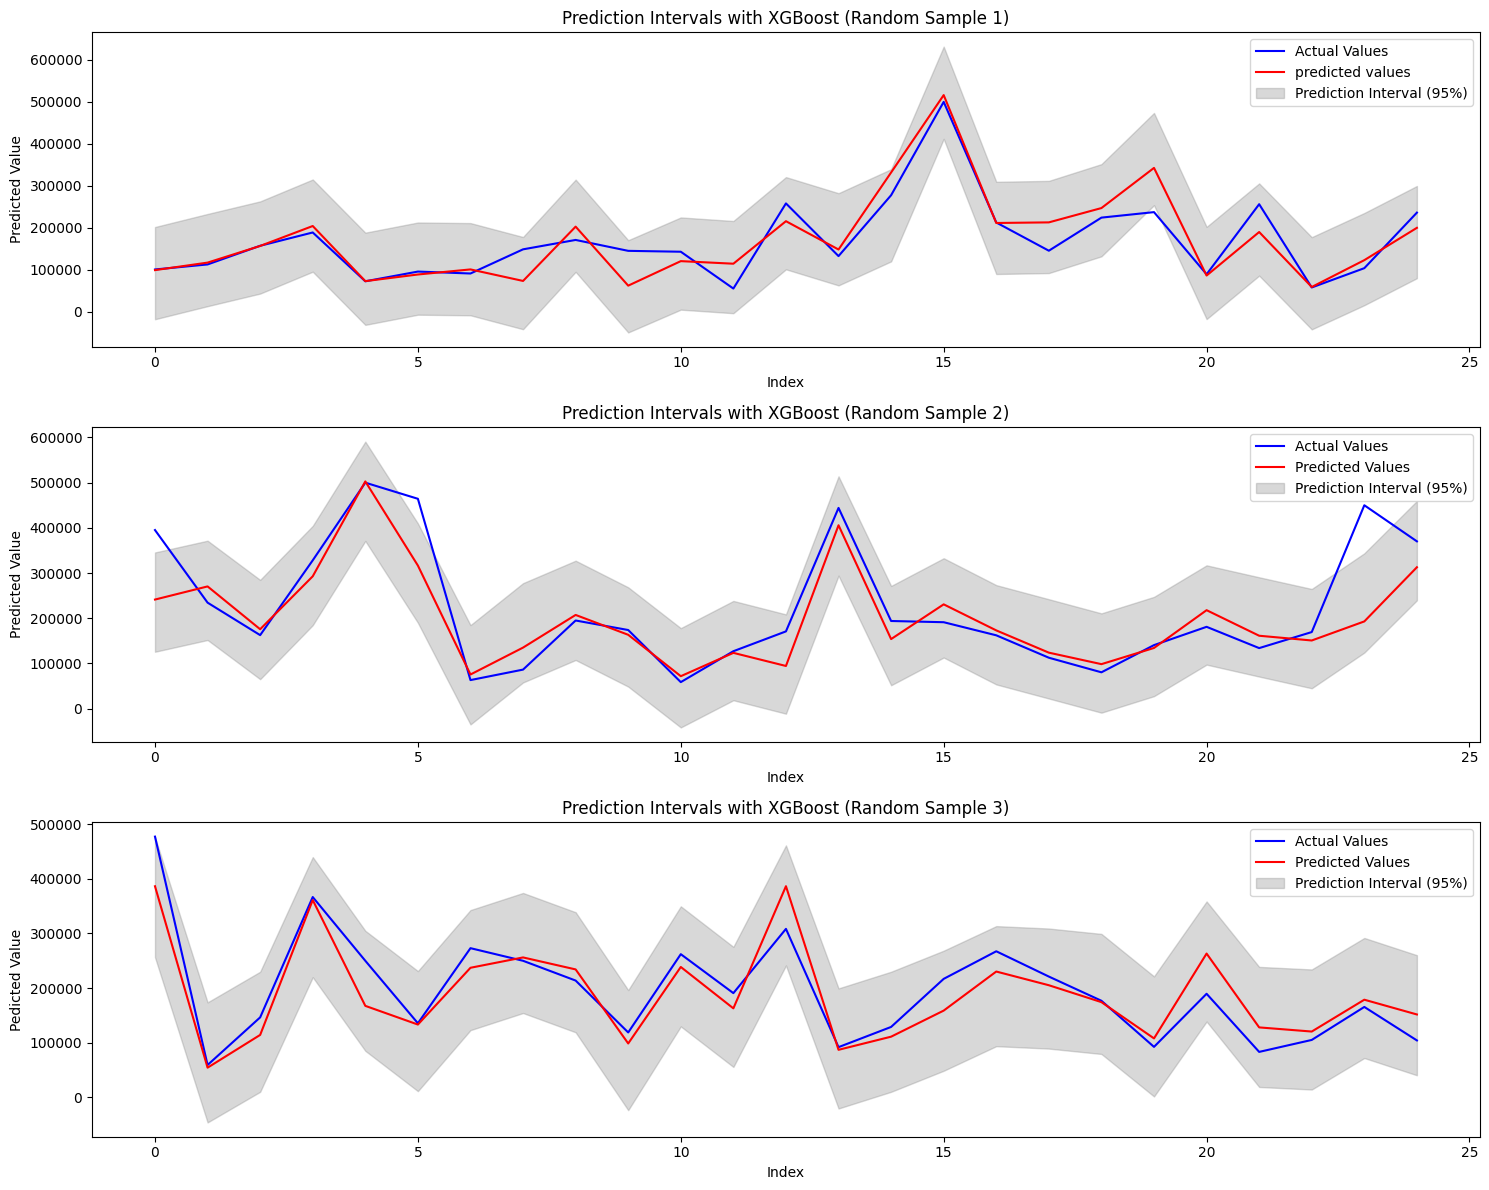

In [73]:

random_indices_1=random.sample(range(0,len(y_pred_lgbm_original)),25)
random_indices_2=random.sample(range(0,len(y_pred_lgbm_original)),25)
random_indices_3=random.sample(range(0,len(y_pred_lgbm_original)),25)


plt.figure(figsize=(15,12))


plt.subplot(3,1,1)
plt.plot(range(25),y_test_original.values[random_indices_1],label="Actual Values",color="blue")
plt.plot(range(25), y_pred_lgbm_original[random_indices_1],label="predicted values",color="red")
plt.fill_between(range(25), lower_bound[random_indices_1],upper_bound[random_indices_1],color="gray",alpha=0.3,label="Prediction Interval (95%)")
plt.legend()
plt.title("Prediction Intervals with XGBoost (Random Sample 1)")
plt.xlabel("Index")
plt.ylabel("Predicted Value")


plt.subplot(3, 1, 2)
plt.plot(range(25), y_test_original.values[random_indices_2],label="Actual Values",color="blue")
plt.plot(range(25), y_pred_lgbm_original[random_indices_2],label="Predicted Values",color="red")
plt.fill_between(range(25), lower_bound[random_indices_2],upper_bound[random_indices_2],color="gray",alpha=0.3,label="Prediction Interval (95%)")
plt.legend()
plt.title("Prediction Intervals with XGBoost (Random Sample 2)")
plt.xlabel("Index")
plt.ylabel("Predicted Value")


plt.subplot(3, 1, 3)
plt.plot(range(25), y_test_original.values[random_indices_3], label="Actual Values", color="blue")
plt.plot(range(25), y_pred_lgbm_original[random_indices_3], label="Predicted Values", color="red")
plt.fill_between(range(25), lower_bound[random_indices_3], upper_bound[random_indices_3], color="gray", alpha=0.3, label="Prediction Interval (95%)")
plt.legend()
plt.title("Prediction Intervals with XGBoost (Random Sample 3)")
plt.xlabel("Index")
plt.ylabel("Pedicted Value")

plt.tight_layout()  
plt.show()
